In [47]:
#dependencies fbprophet, plotly, matplotlib,gcc,PyStan, sklearn

In [48]:
import pandas as pd
import datetime
import time
import os
import matplotlib.pyplot as plt
import descartes
from tabulate import tabulate
import datetime as dt
import fbprophet
from fbprophet import Prophet
from sklearn.model_selection import train_test_split
from fbprophet.plot import add_changepoints_to_plot

In [49]:
df = pd.read_csv("covid19_dataset_clean.csv")
df_per_day = df.groupby('Date')['Confirmed', 'Recovered', 'Deaths'].sum()
print(tabulate(df_per_day,headers='keys'))

Date            Confirmed    Recovered    Deaths
-------  ----------------  -----------  --------
1/22/20     555                     28        17
1/23/20     654                     30        18
1/24/20     941                     38        26
1/25/20    1434                     83        42
1/26/20    2118                     63        56
1/27/20    2927                    105        82
1/28/20    5578                    126       131
1/29/20    6166                    143       133
1/30/20    8234                    222       171
1/31/20    9927                    284       213
2/1/20    12038                    472       259
2/10/20   42762                   4683      1013
2/11/20   44802                   5608      1113
2/12/20   45221                  12846      1118
2/13/20   60368                  10355      1371
2/14/20   66885                  10852      1523
2/15/20   69030                  12576      1666
2/16/20   71224                  14343      1770
2/17/20   73258     

C:\Users\chali\.conda\envs\my_env\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


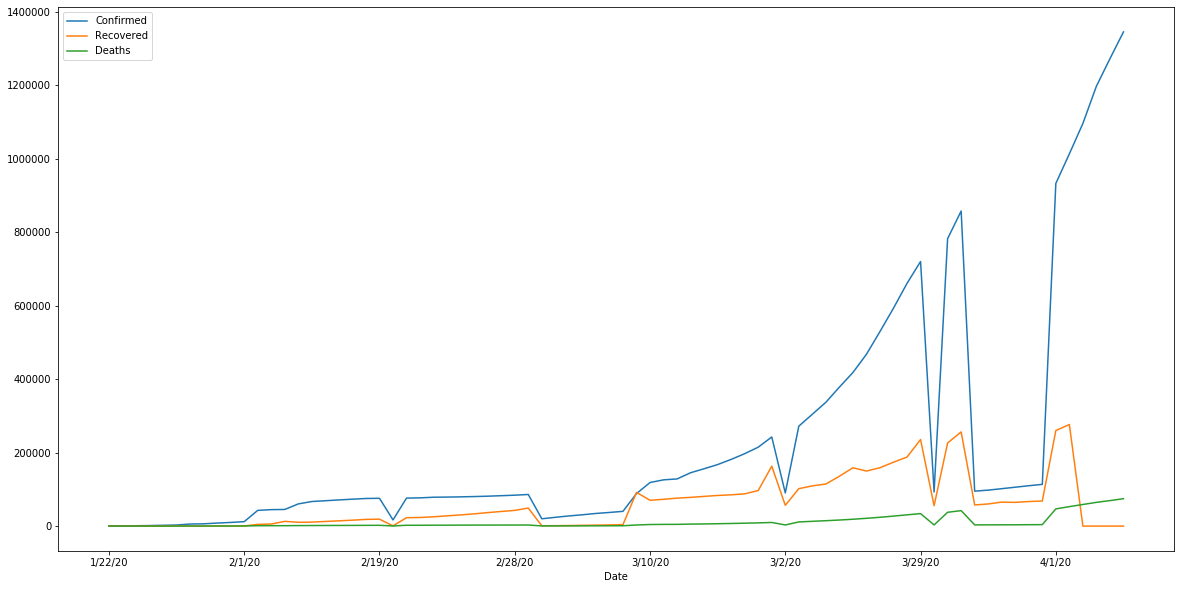

In [50]:
df_per_day.plot(kind="line", figsize=(20,10))

In [51]:
m = Prophet()
m.add_seasonality(name="monthly",period=30.5,fourier_order=5)
global_cases = df_per_day.reset_index()
global_cases.head()

,Date,Confirmed,Recovered,Deaths
0,1/22/20,555,28.0,17
1,1/23/20,654,30.0,18
2,1/24/20,941,38.0,26
3,1/25/20,1434,83.0,42
4,1/26/20,2118,63.0,56


In [52]:
confirmed_cases = global_cases[["Date","Confirmed"]]
recovered_cases = global_cases[["Date","Recovered"]]

In [53]:
confirmed_cases.rename(columns={"Date":"ds","Confirmed":"y"},inplace=True)

C:\Users\chali\.conda\envs\my_env\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [54]:
train, test = train_test_split(confirmed_cases, test_size=0.2, shuffle=False)
train.head()

,ds,y
0,1/22/20,555
1,1/23/20,654
2,1/24/20,941
3,1/25/20,1434
4,1/26/20,2118


In [55]:
m.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [56]:
#future
future_dates = m.make_future_dataframe(periods=15) 

In [57]:
prediction = m.predict(future_dates)

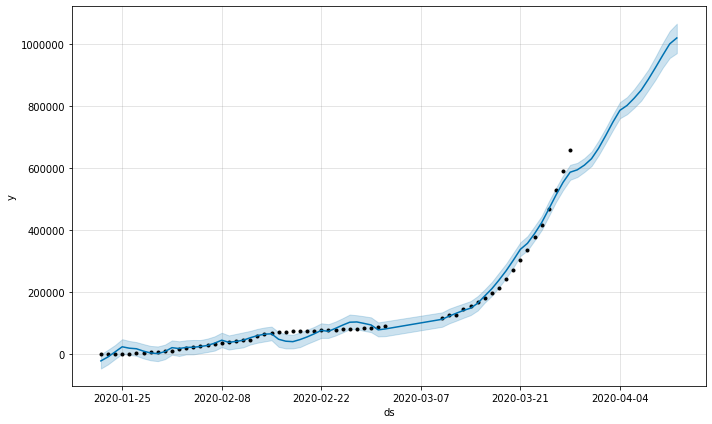

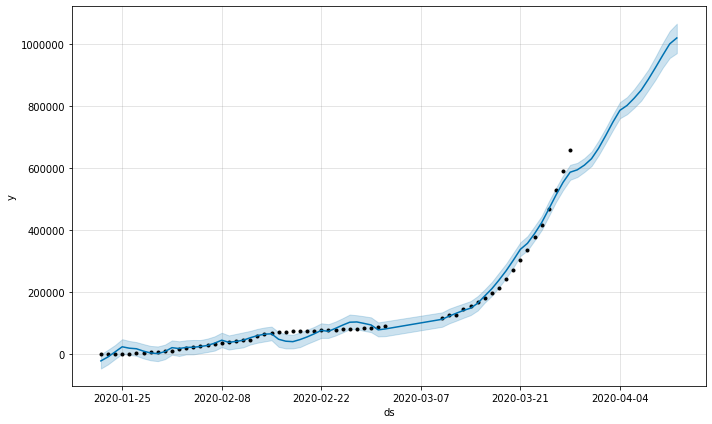

In [58]:
m.plot(prediction)

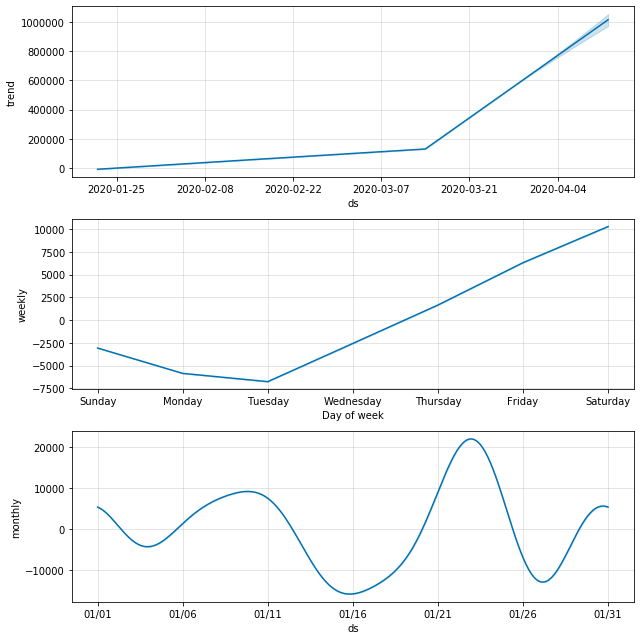

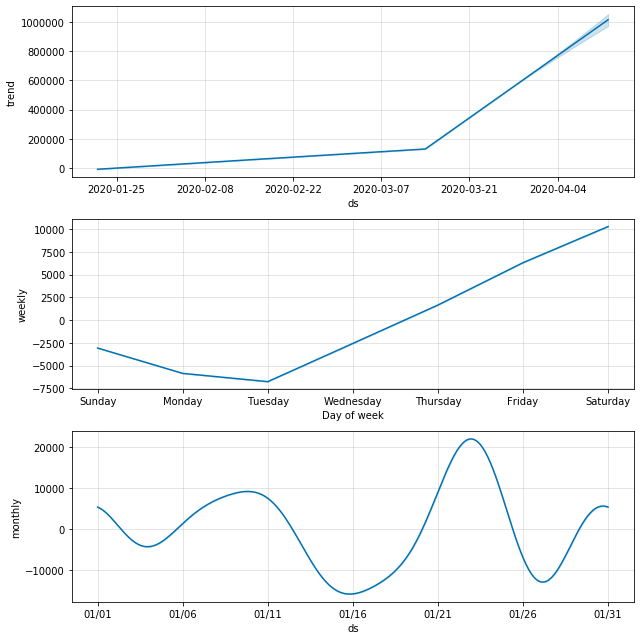

In [59]:
m.plot_components(prediction)

In [60]:
test['dates'] = pd.to_datetime(test['ds'])

C:\Users\chali\.conda\envs\my_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
test

,ds,y,dates
60,3/29/20,720117,2020-03-29
61,3/3/20,92840,2020-03-03
62,3/30/20,782365,2020-03-30
63,3/31/20,857487,2020-03-31
64,3/4/20,95120,2020-03-04
65,3/5/20,97886,2020-03-05
66,3/6/20,101801,2020-03-06
67,3/7/20,105847,2020-03-07
68,3/8/20,109821,2020-03-08
69,3/9/20,113590,2020-03-09


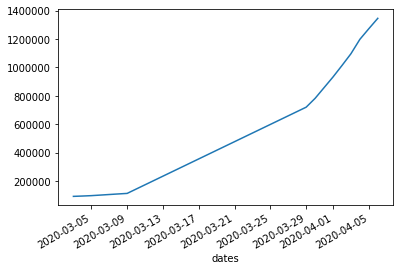

In [62]:
test = test.set_index("dates")
test = test['y']
test.plot()

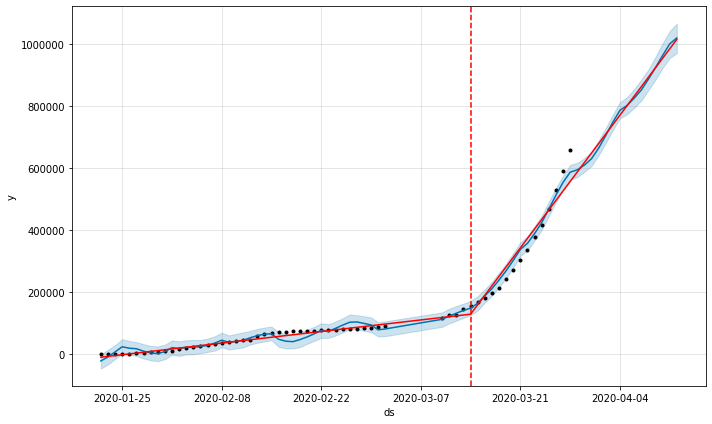

In [63]:
fig = m.plot(prediction)
c = add_changepoints_to_plot(fig.gca(),m,prediction)